In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from CatanEnv import CatanSetupEnv
from SBPPO import PPO
from GameStateViewer import SaveGameStateImage
from ActorCriticPolicy import ActorCriticPolicy

In [3]:
env = CatanSetupEnv()

model = PPO(ActorCriticPolicy, env, verbose=1)
# model.learn(total_timesteps=10_000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


10
4


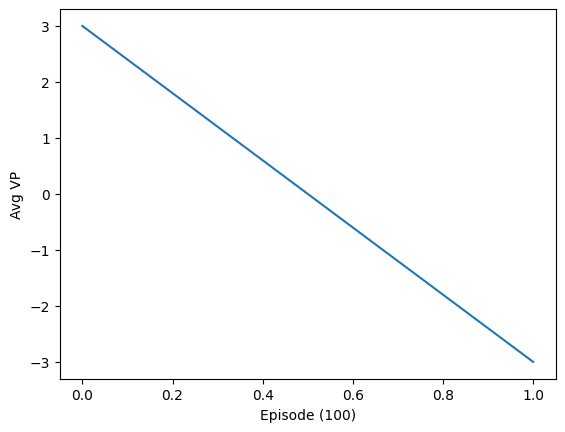

In [4]:
##############################################################
rewardList = []
rewardList100 = []

for episode in range(1):
    done = False
    state, info = env.reset()
    actionMask = info["ActionMask"]

    while done != True:
        action, _states = model.predict(state, deterministic=True)
        state, reward, done, _, info = env.step(action.item())
        print(reward+7)
        rewardList.append(reward)
    
    # SaveGameStateImage(env.game.gameState, "TRAINING.png")

    # if episode % 100 == 0:
    #         rewardList100.append(np.round(np.sum(rewardList[-100:])/100, decimals = 3))
    #         print("episode: {}, Reward: {}\n".format(episode, rewardList100[-1]))


# plt.plot(rewardList)
# plt.xlabel('Episode (100)')
# plt.ylabel('Avg VP')
# plt.show()